In [ ]:
# En este jupyter estoy ordenando los países según el gdp per capita que tiene cada uno. En primer lugar lo separo por continentes y cojo de cada continente los 5 por la cabeza y por la cola y los añado a un dataframe con los valores ordenados por el gdp. Después vemos la correlación que tienen con un heatmap. 

# 1) Definir la función que saca dos subplots comparando todoos los valores
# 2) Definir la función que saca 4 sublots, comparando los 20 países que más pib tienen con su ratio de muertes para que se vea más claro
# 3) Hacerlo por continentes

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
covid_groupby = pd.read_csv("0-covid_groupby.csv")
covid_groupby.drop("Unnamed: 0", axis=1, inplace=True)
covid_groupby

,continent,country,median_age,aged_65_older,aged_70_older,non_risky_age,risky_age,total_cases,total_deaths,deaths_ratio,hospital_beds_per_thousand,gdp_per_capita,HDI
0,Asia,Afghanistan,18.6,2.581,1.337,96.082,3.918,63819.0,2751.0,4.310628,0.50,1803.987,0.511
1,Europe,Albania,38.0,13.188,8.643,78.169,21.831,132071.0,2436.0,1.844462,2.89,11803.431,0.795
2,Africa,Algeria,29.1,6.211,3.857,89.932,10.068,125693.0,3388.0,2.695456,1.90,13913.839,0.748
3,North America,Antigua and Barbuda,32.1,6.933,4.631,88.436,11.564,1251.0,42.0,3.357314,3.80,21490.943,0.778
4,South America,Argentina,31.9,11.198,7.441,81.361,18.639,3371508.0,71771.0,2.128751,5.00,18933.907,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,South America,Venezuela,29.0,6.614,3.915,89.471,10.529,217603.0,2428.0,1.115793,0.80,16745.022,0.711
151,Asia,Vietnam,32.6,7.150,4.718,88.132,11.868,4512.0,37.0,0.820035,2.60,6171.884,0.704
152,Asia,Yemen,20.3,2.922,1.583,95.495,4.505,6586.0,1297.0,19.693289,0.70,1479.147,0.470
153,Africa,Zambia,17.7,2.480,1.542,95.978,4.022,92520.0,1263.0,1.365110,2.00,3689.251,0.584


In [104]:
covid_groupby.groupby("continent").sum()

,median_age,aged_65_older,aged_70_older,non_risky_age,risky_age,total_cases,total_deaths,deaths_ratio,hospital_beds_per_thousand,gdp_per_capita,HDI
continent,,,,,,,,,,,
Africa,853.9,152.254,91.849,3655.897,244.103,4234475.0,118735.0,85.084588,59.320,241482.473,22.470
Asia,1272.4,272.846,165.835,3761.319,438.681,47155918.0,614173.0,71.395615,123.430,956522.471,31.071
Europe,1641.6,691.419,459.074,2749.507,1150.493,45652802.0,1046428.0,78.694437,196.472,1320439.786,34.362
North America,621.8,170.666,107.832,1721.502,278.498,38334189.0,865038.0,46.257101,41.980,342445.801,15.083
Oceania,104.4,37.050,23.133,239.817,60.183,32828.0,940.0,6.259513,8.750,89437.528,2.618
South America,362.6,99.327,62.232,1038.441,161.559,26993962.0,735382.0,31.284390,24.820,166089.423,9.158


In [4]:
def cases_continent(continent):
    x = covid_groupby[covid_groupby["continent"] == continent ]
    return x

In [5]:
def sort_value(continent, value="gdp_per_capita"):
    y = continent.sort_values(value, ascending=False)
    print(len(y.values))
    if len(y.values) > 10:
        x = y.head(5).append(y.tail(5))
        return x
    return y


In [6]:
africa = cases_continent("Africa")
asia = cases_continent("Asia")
europe = cases_continent("Europe")
north_america = cases_continent("North America")
oceania = cases_continent("Oceania")
south_america = cases_continent("South America")


In [67]:
s_gdp_africa = sort_value(africa)
s_gdp_asia = sort_value(asia)
s_gdp_europe = sort_value(europe)
s_gdp_north_america = sort_value(north_america)
s_gdp_south_america = sort_value(south_america)
s_gdp_oceania = sort_value(oceania)

39
42
39
20
12
3


In [60]:
gdp_mundo = pd.concat([s_gdp_africa, s_gdp_asia, s_gdp_europe, s_gdp_north_america, s_gdp_south_america, s_gdp_oceania], axis=0)
gdp_mundo_sorted = gdp_mundo.sort_values("gdp_per_capita", ascending=False)
gdp_mundo_sorted.reset_index(inplace=True, drop=True)

In [58]:
def visualization_heatmap(df):
    plt.figure(figsize=(15,10))
    sns.heatmap(df.corr(), annot=True)

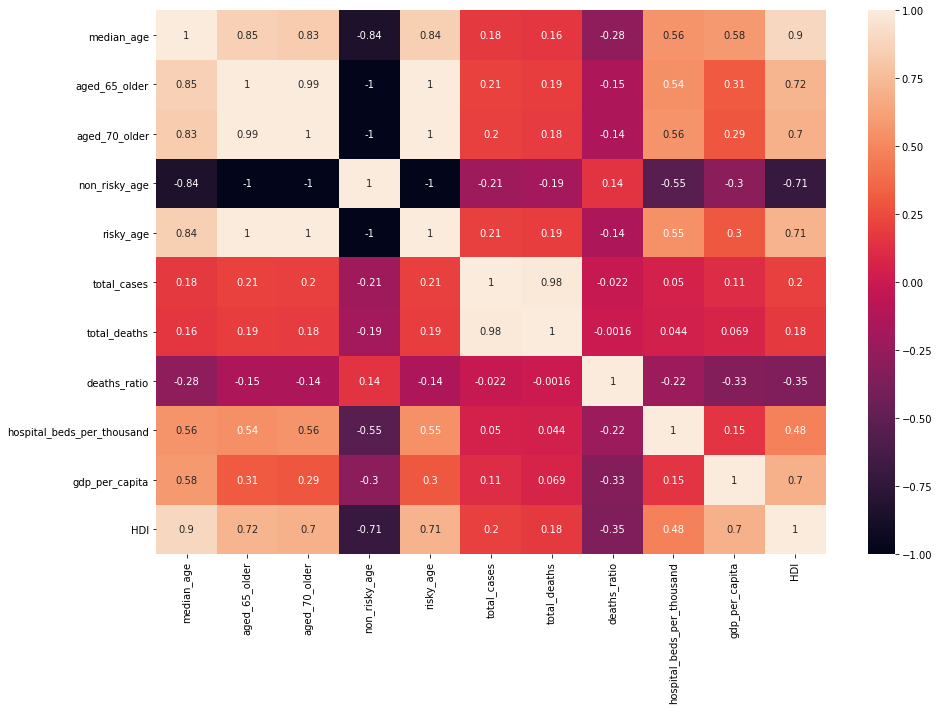

In [59]:
visualization_heatmap(gdp_mundo_sorted)

In [89]:
def subplot_bar(x1, x2, y, data, title1, title2, size1, size2):

    plt.figure(figsize=(size1,size2))

    plt.subplot(2,2,1) #filas, columnas, a cual de los dos lienzos quiero acceder
    sns.barplot(x=x1, y=y, data=data, color="b", alpha=0.6, label=x1).set(title=title1)
    plt.legend()

    plt.subplot(2,2,2) #filas, columnas, a cual de los dos lienzos quiero acceder
    sns.barplot(x=x2, y=y, data=data, color="m", alpha=0.6, label=x2).set(title=title2, ylabel=None, yticklabels=[])
    plt.legend()
    plt.subplots_adjust(wspace=0.02, hspace=0)

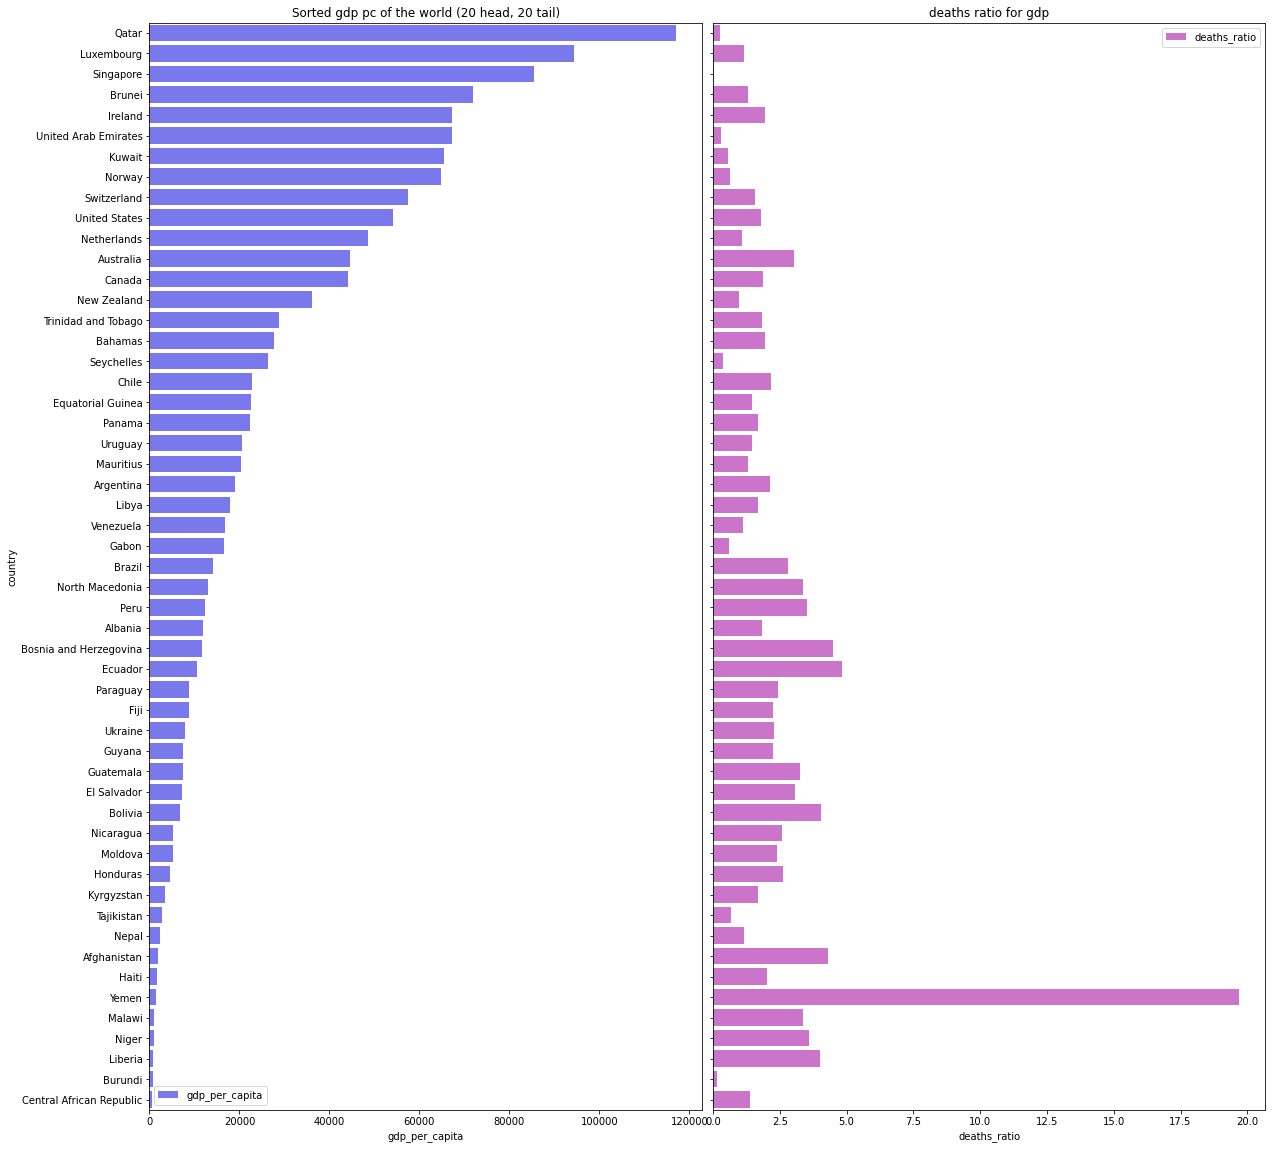

In [90]:
subplot_bar("gdp_per_capita", "deaths_ratio", "country", gdp_mundo_sorted, "Sorted gdp pc of the world (20 head, 20 tail)", "deaths ratio for gdp", 20, 40)

In [105]:
def visualizacion_cuatro(data, suptitle, x1, x2, y, t1, t2, t3, t4, n):

    fig, axes = plt.subplots(2, 2, figsize=(20,20))
    fig.suptitle(suptitle)

    sns.barplot(ax=axes[0, 0], data=data.head(n), x=x1, y=y, color="b", alpha=0.5).set(xlabel=None)

    sns.barplot(ax=axes[1, 1], data=data.head(n), x=x2, y=y, color="g", alpha=0.5).set(xlabel=None, ylabel=None, yticklabels=[])

    sns.barplot(ax=axes[1, 0], data=data.tail(n), x=x1, y=y, color="b", alpha=0.5, label=x1)

    sns.barplot(ax=axes[1, 1], data=data.tail(n), x=x2, y=y, color="m", alpha=0.5, label=x2).set(ylabel=None, yticklabels=[])
    plt.legend()

    axes[0, 0].set_title(t1)
    axes[0, 1].set_title(t2)
    axes[1, 0].set_title(t3)
    axes[1, 1].set_title(t4)
    plt.subplots_adjust(wspace=0.02, hspace=0.1)

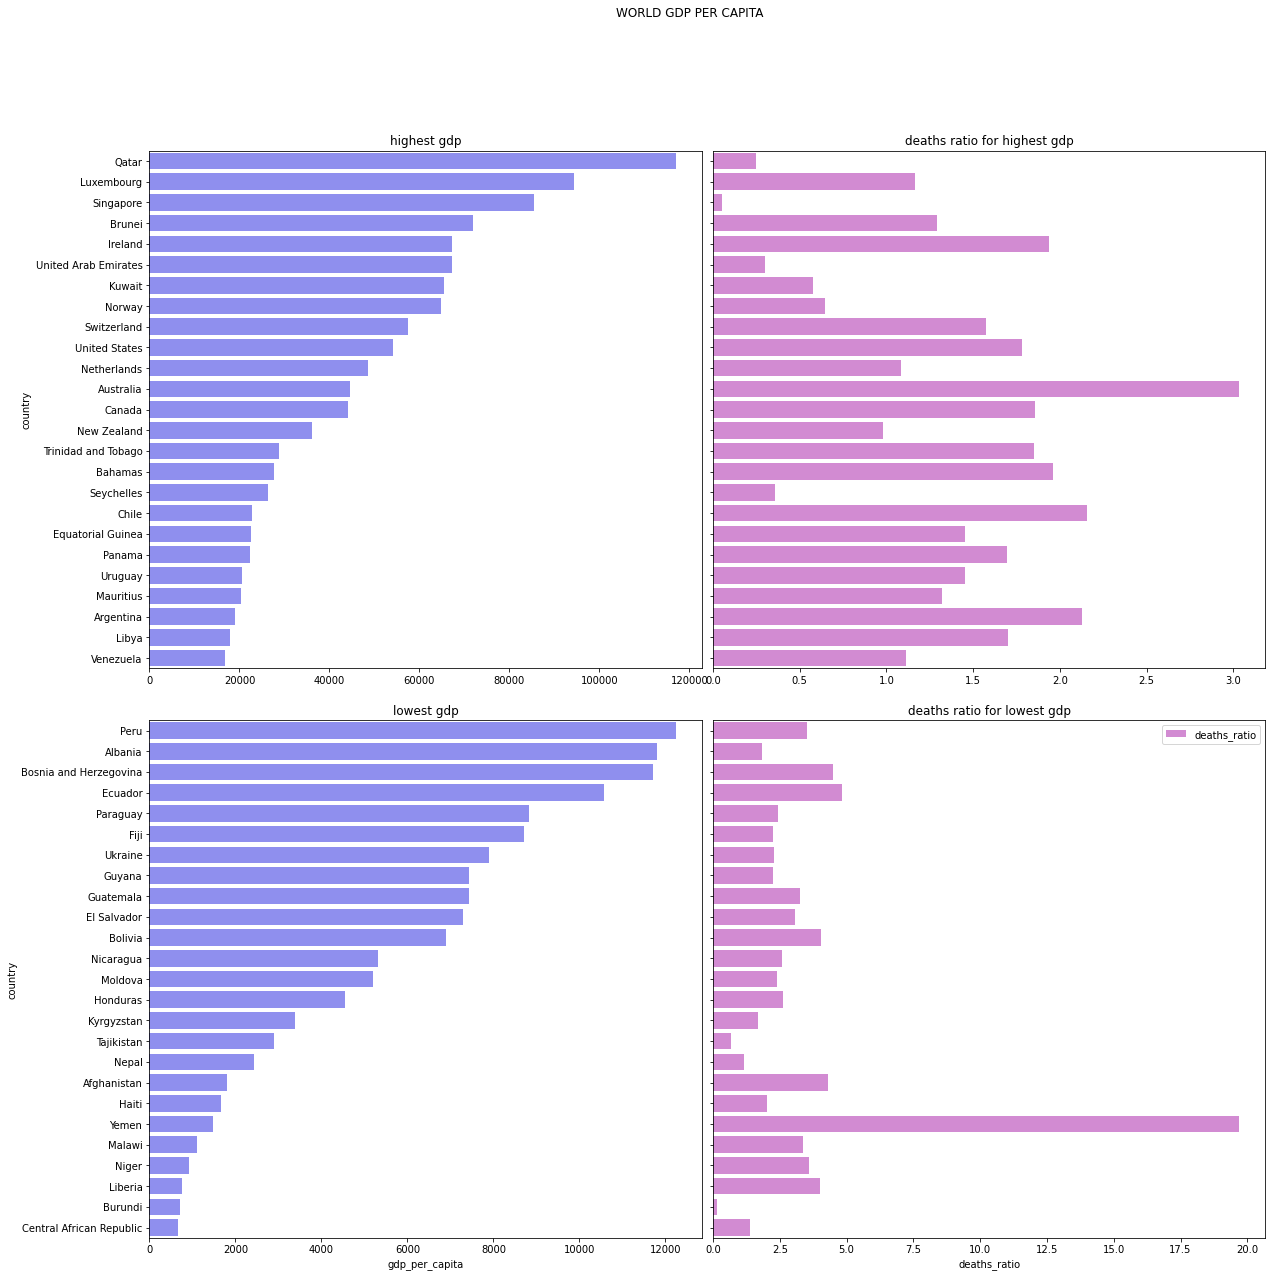

In [79]:
visualizacion_cuatro(gdp_mundo_sorted, 'WORLD GDP PER CAPITA', 'gdp_per_capita', 'deaths_ratio', 'country', "highest gdp", "deaths ratio for highest gdp", "lowest gdp", "deaths ratio for lowest gdp", 25)

In [66]:
s_gdp_africa

,continent,country,median_age,aged_65_older,aged_70_older,non_risky_age,risky_age,total_cases,total_deaths,deaths_ratio,hospital_beds_per_thousand,gdp_per_capita,HDI
123,Africa,Seychelles,36.2,8.606,5.586,85.808,14.192,9764.0,35.0,0.358460,3.6,26382.287,0.796
45,Africa,Equatorial Guinea,22.4,2.846,1.752,95.402,4.598,7694.0,112.0,1.455680,2.1,22604.873,0.592
93,Africa,Mauritius,37.4,10.945,5.884,83.171,16.829,1288.0,17.0,1.319876,3.4,20292.745,0.804
85,Africa,Libya,29.0,4.424,2.816,92.760,7.240,182012.0,3097.0,1.701536,3.7,17881.509,0.724
53,Africa,Gabon,23.1,4.450,2.976,92.574,7.426,23909.0,145.0,0.606466,6.3,16562.413,0.703
89,Africa,Malawi,18.1,2.979,1.783,95.238,4.762,34231.0,1153.0,3.368292,1.3,1095.042,0.483
105,Africa,Niger,15.1,2.553,1.378,96.069,3.931,5348.0,192.0,3.590127,0.3,926.000,0.394
84,Africa,Liberia,19.2,3.057,1.756,95.187,4.813,2131.0,85.0,3.988738,0.8,752.788,0.480
25,Africa,Burundi,17.5,2.562,1.504,95.934,4.066,4353.0,6.0,0.137836,0.8,702.225,0.433
30,Africa,Central African Republic,18.3,3.655,2.251,94.094,5.906,7010.0,96.0,1.369472,1.0,661.240,0.397


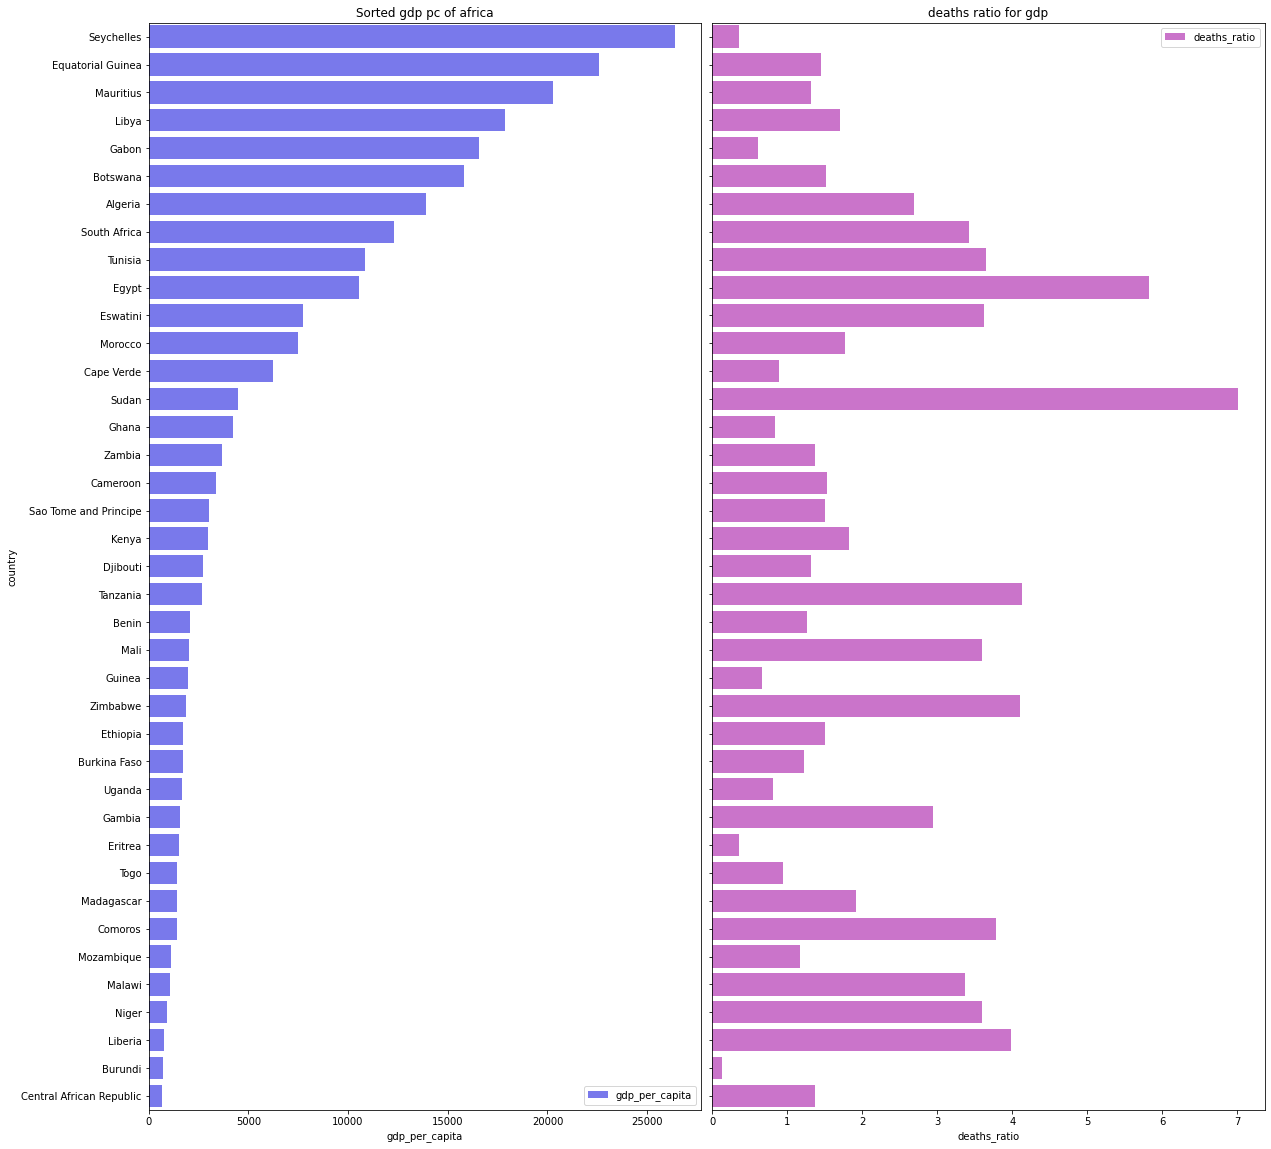

In [91]:
subplot_bar("gdp_per_capita",  "deaths_ratio", "country", africa.sort_values("gdp_per_capita", ascending=False), "Sorted gdp pc of africa", "deaths ratio for gdp", 20 ,40)

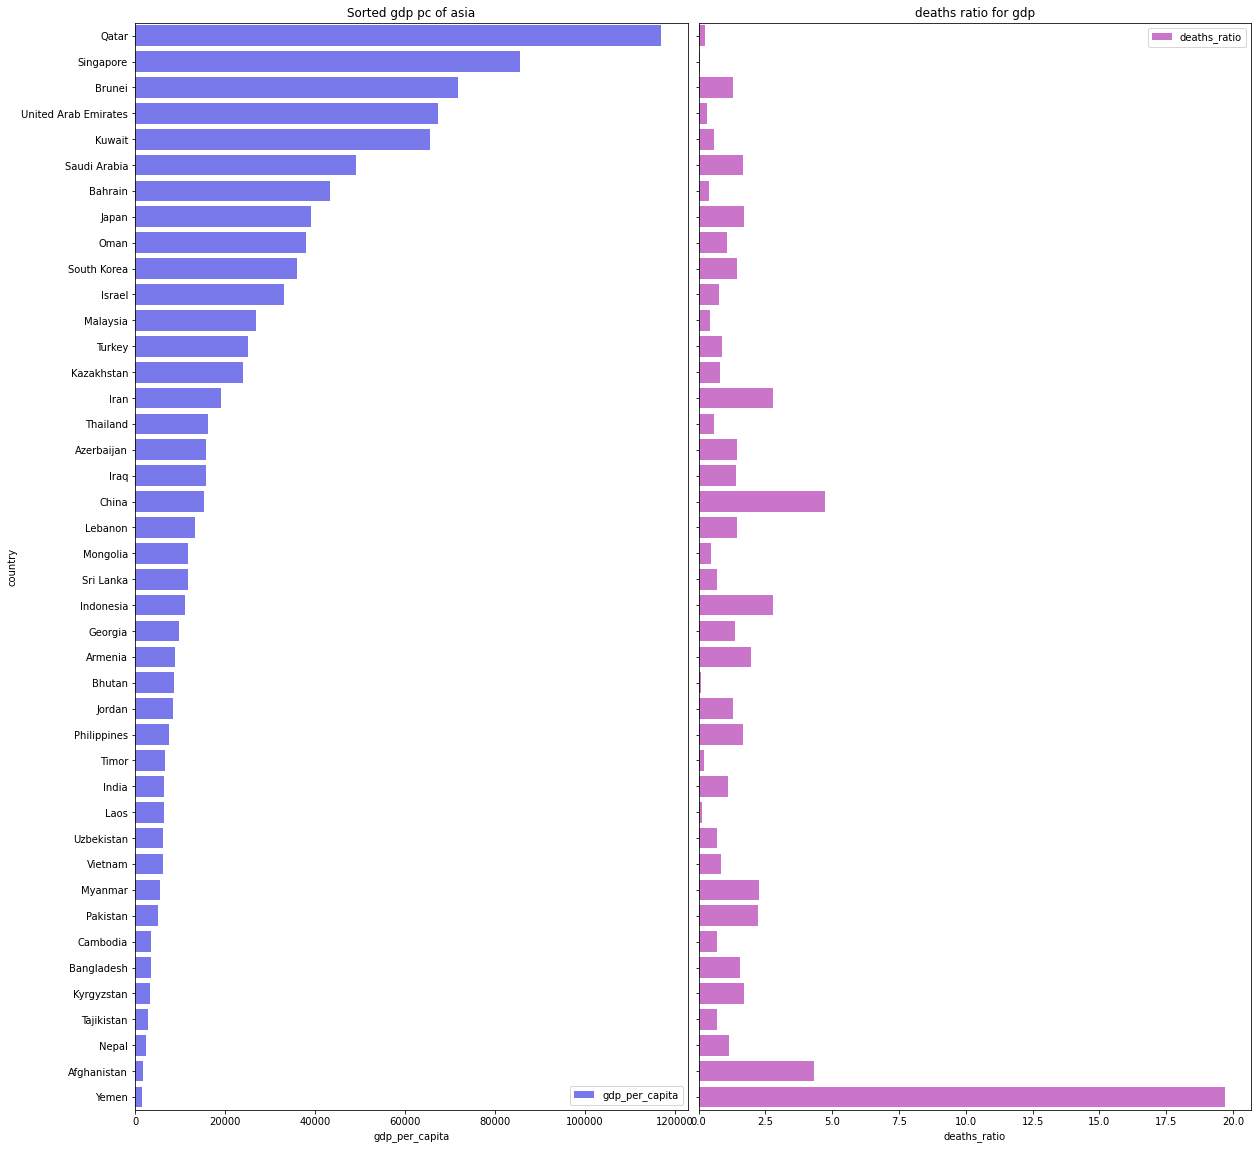

In [92]:
subplot_bar("gdp_per_capita","deaths_ratio", "country", asia.sort_values("gdp_per_capita", ascending=False), "Sorted gdp pc of asia", "deaths ratio for gdp", 20, 40)

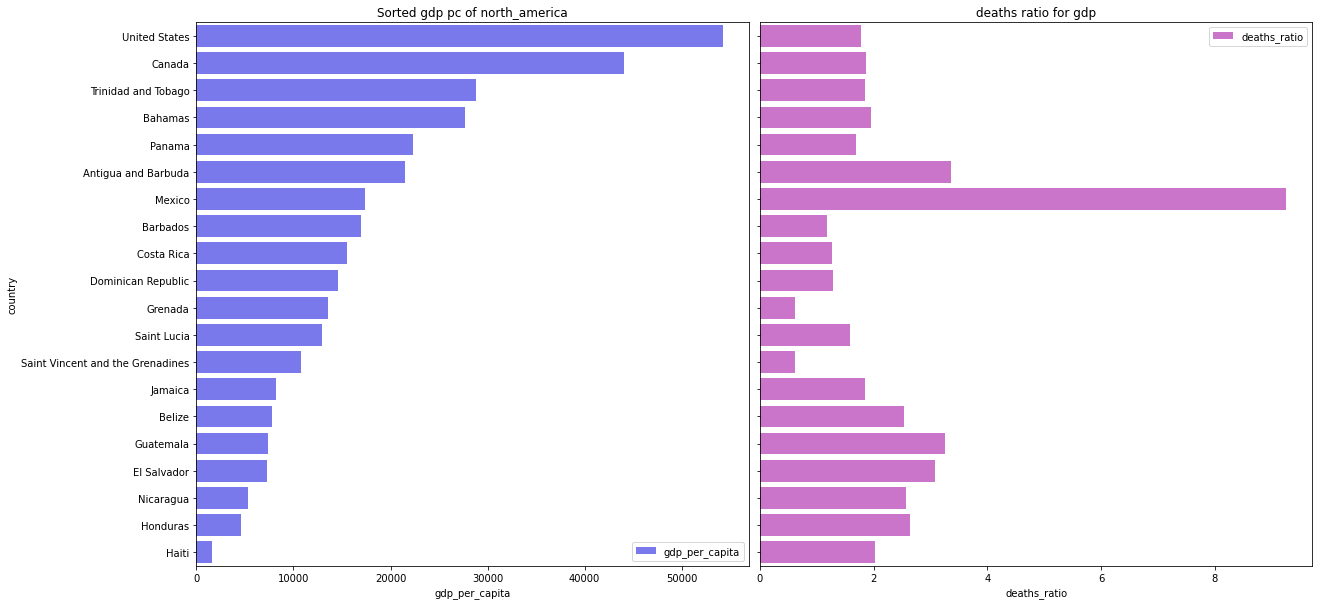

In [95]:
subplot_bar("gdp_per_capita", "deaths_ratio", "country", north_america.sort_values("gdp_per_capita", ascending=False), "Sorted gdp pc of north_america", "deaths ratio for gdp", 20, 20)

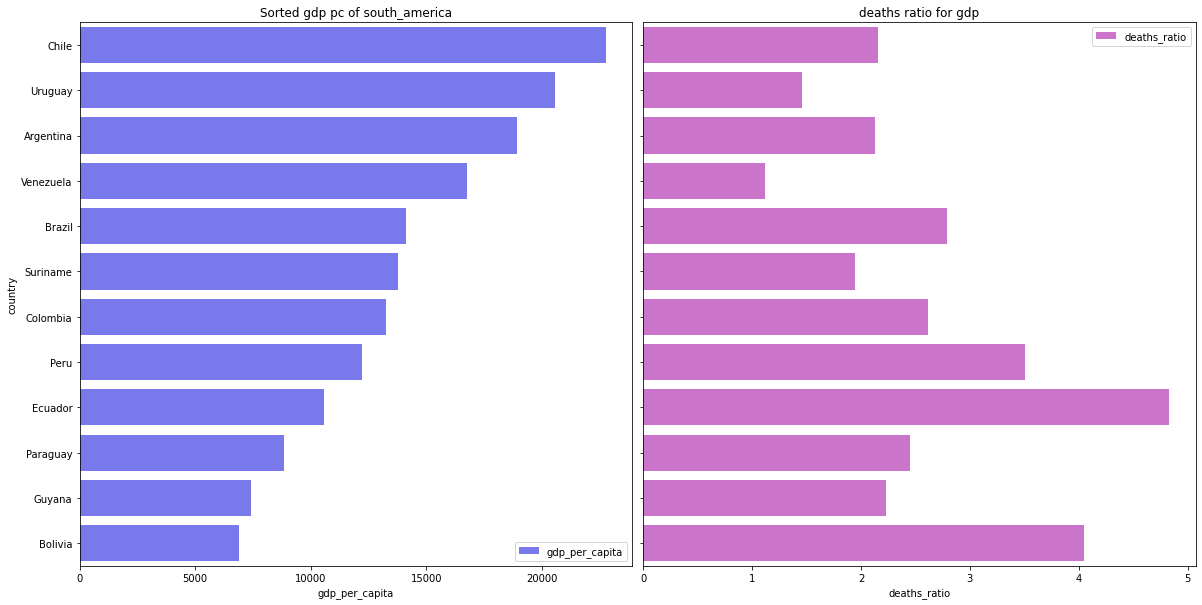

In [99]:
subplot_bar("gdp_per_capita", "deaths_ratio", "country", south_america.sort_values("gdp_per_capita", ascending=False), "Sorted gdp pc of south_america", "deaths ratio for gdp", 20, 20)

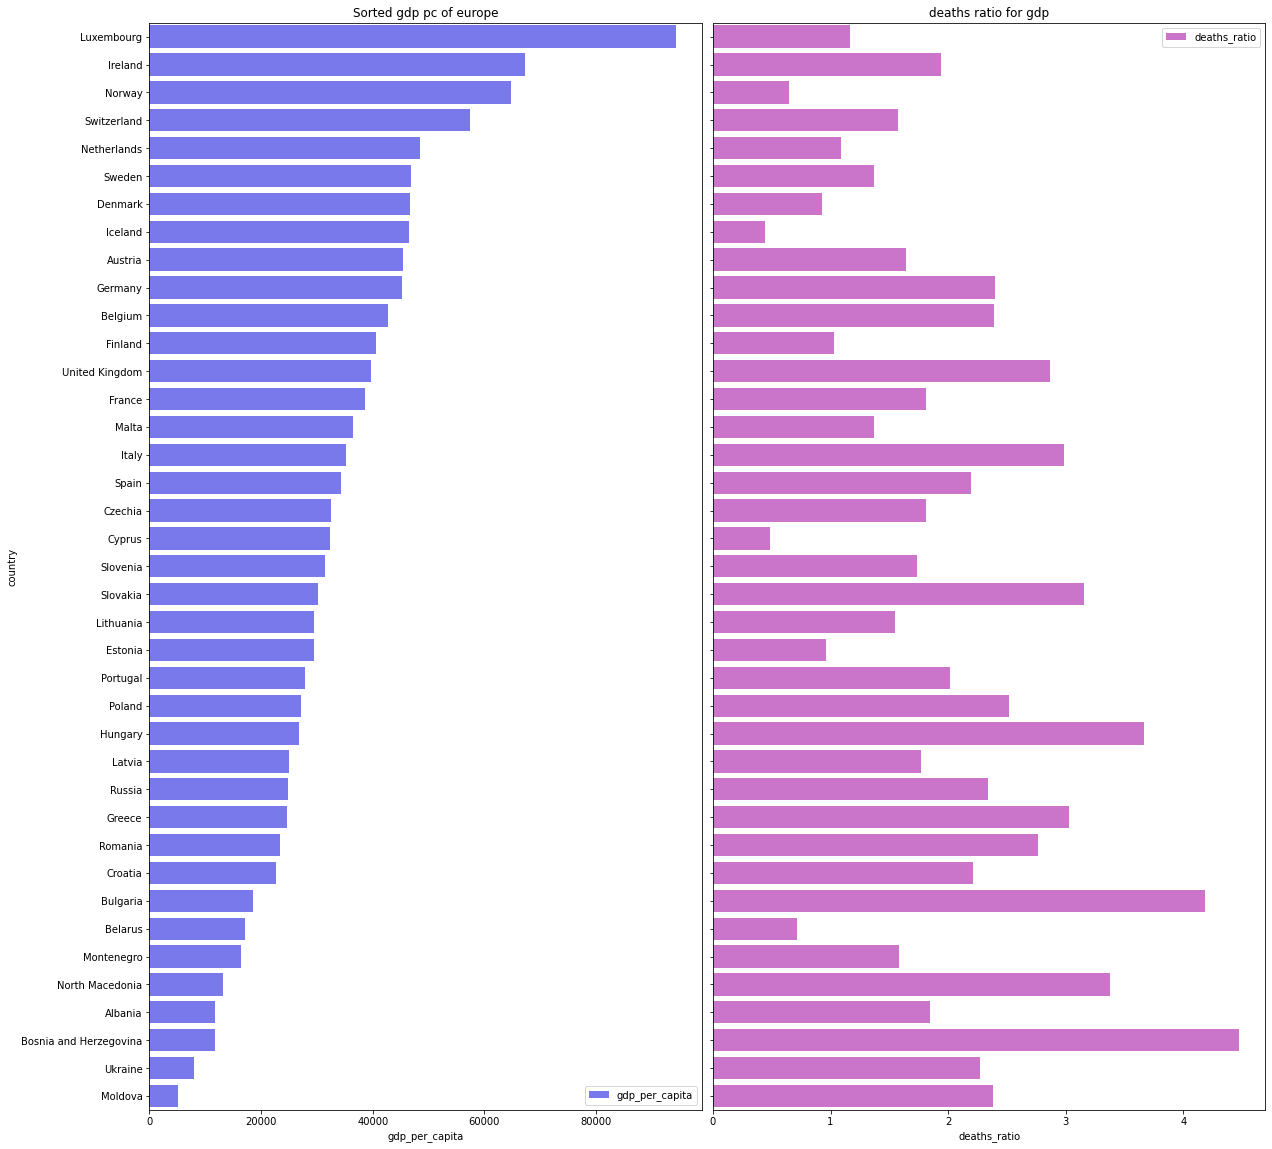

In [100]:
subplot_bar("gdp_per_capita", "deaths_ratio", "country", europe.sort_values("gdp_per_capita", ascending=False), "Sorted gdp pc of europe", "deaths ratio for gdp", 20, 40)

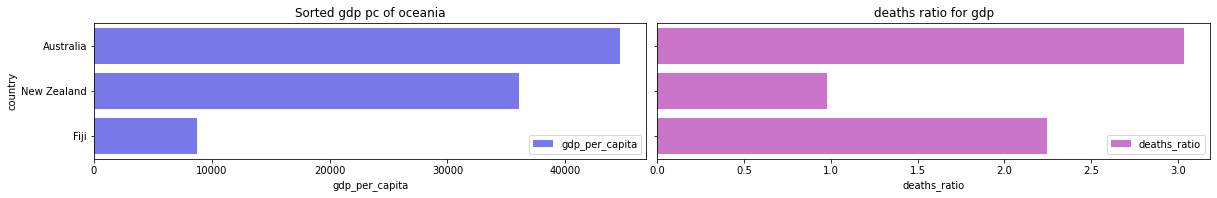

In [103]:
subplot_bar("gdp_per_capita", "deaths_ratio", "country", oceania.sort_values("gdp_per_capita", ascending=False), "Sorted gdp pc of oceania", "deaths ratio for gdp", 20, 5)